In [637]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

**1. Uploading Data Train**

In [638]:
DTrain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Enhance IT/KNN/MNIST_train.csv')

print(DTrain.head(5))
print(DTrain.shape)

   index  labels  0  1  2  3  4  5  ...  776  777  778  779  780  781  782  783
0      0       5  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
1      1       0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
2      2       4  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
3      3       1  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
4      4       9  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0

[5 rows x 786 columns]
(60000, 786)


In [639]:
X_train = DTrain.drop(["labels", "index"], axis=1)
X_train_toplot = X_train
print (X_train)
print (X_train.shape)

       0  1  2  3  4  5  6  7  8  ...  775  776  777  778  779  780  781  782  783
0      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
1      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
2      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
3      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
4      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
...   .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
59995  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
59996  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
59997  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
59998  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
59999  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0

[60

In [640]:
from math import sqrt
#St_X_train = X_train.describe()
St_X_train = X_train.to_numpy()
St_X_train = St_X_train.flatten()

def max(n):
  max = n[0]
  for i in range(0, len(n)):
    if n[i] > max:
      max = n[i]
  return max

'''
def min(n):
  min = n[0]
  for i in range(0, len(n)):
    if n[i] < min:
      min = n[i]
  return min

def mean(n):
  count = 0
  sum = n[0]
  for i in range(0, len(n)):
      count = count + 1
      sum = sum + n[i]
  mean=sum/count
  return mean

def std(n):
  count = 0
  sum = n[0]
  
  for i in range(0, len(n)):
      count = count + 1
      sum = sum + n[i]
  mean=sum/count

  std_sum = 0
  for i in n:
    std_sum += (i-mean)**2
  std = std_sum / (count-1)

  return sqrt(std)


print("The max value is: ", max(St_X_train))
print("The min value is: ", min(St_X_train))
print("The mean is: ", mean(St_X_train))
print("The std is: ", std(St_X_train))

'''

'\ndef min(n):\n  min = n[0]\n  for i in range(0, len(n)):\n    if n[i] < min:\n      min = n[i]\n  return min\n\ndef mean(n):\n  count = 0\n  sum = n[0]\n  for i in range(0, len(n)):\n      count = count + 1\n      sum = sum + n[i]\n  mean=sum/count\n  return mean\n\ndef std(n):\n  count = 0\n  sum = n[0]\n  \n  for i in range(0, len(n)):\n      count = count + 1\n      sum = sum + n[i]\n  mean=sum/count\n\n  std_sum = 0\n  for i in n:\n    std_sum += (i-mean)**2\n  std = std_sum / (count-1)\n\n  return sqrt(std)\n\n\nprint("The max value is: ", max(St_X_train))\nprint("The min value is: ", min(St_X_train))\nprint("The mean is: ", mean(St_X_train))\nprint("The std is: ", std(St_X_train))\n\n'

In [641]:
Y_train = DTrain['labels']
Y_train_toplot = Y_train
print (Y_train)
print (Y_train.shape)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: labels, Length: 60000, dtype: int64
(60000,)


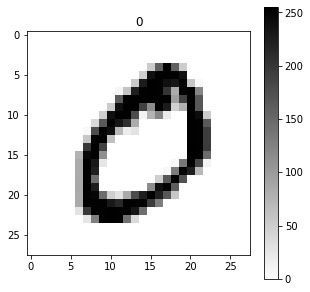

In [642]:
plt.figure(figsize = (5,5))
idx = 1

grid_data = X_train.iloc[idx].to_numpy().reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray_r")
plt.title(Y_train[idx])
plt.colorbar()


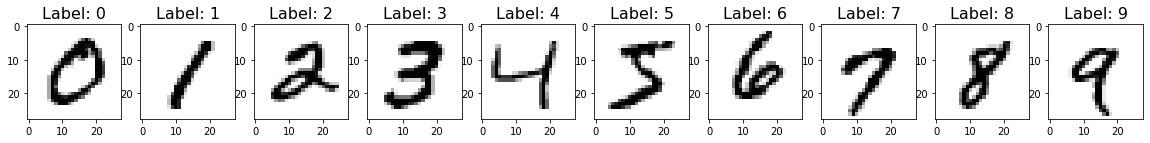

In [643]:
X_train_toplot = X_train_toplot.to_numpy()
Y_train_toplot = Y_train_toplot.to_numpy()

X_train_toplot = X_train_toplot.reshape(60000,28,28)

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train_toplot[Y_train_toplot == i][0]
  ax[i].imshow(sample, cmap='gray_r')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [644]:
# Nomralize

Max_Value = max(St_X_train)
X_train = X_train / Max_Value

print (X_train)

         0    1    2    3    4    5    6  ...  777  778  779  780  781  782  783
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
59995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
59996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
59997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
59998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
59999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[60000 rows x 784 columns]


**2. Uploading Data Test**

In [645]:
DTest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Enhance IT/KNN/MNIST_test.csv')

print(DTest.head(5))
print(DTest.shape)

   index  labels  0  1  2  3  4  5  ...  776  777  778  779  780  781  782  783
0      0       7  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
1      1       2  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
2      2       1  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
3      3       0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0
4      4       4  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0

[5 rows x 786 columns]
(10000, 786)


In [646]:
X_test = DTest.drop(["labels", "index"], axis=1)
X_test_toplot = X_test
print (X_test)
print (X_test.shape)

      0  1  2  3  4  5  6  7  8  ...  775  776  777  778  779  780  781  782  783
0     0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
1     0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
2     0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
3     0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
4     0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
...  .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
9995  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
9996  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
9997  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
9998  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
9999  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0

[10000 rows x 7

In [647]:
Y_test = DTest['labels']
Y_test_toplot = Y_test
print (Y_test)
print (Y_test.shape)

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: labels, Length: 10000, dtype: int64
(10000,)


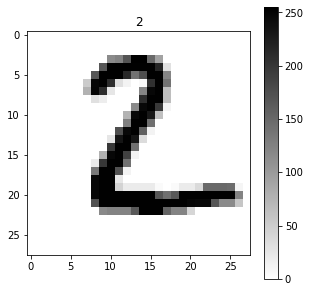

In [648]:
plt.figure(figsize = (5,5))
idx = 1

grid_data = X_test.iloc[idx].to_numpy().reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray_r")
plt.title(Y_test[idx])
plt.colorbar()

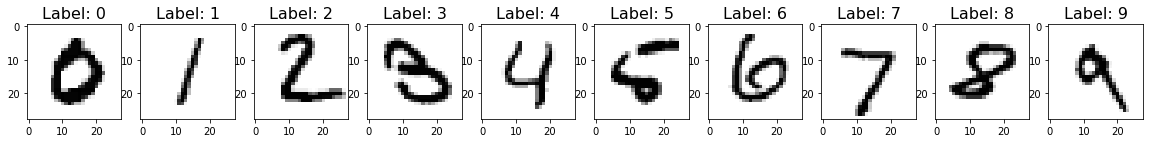

In [649]:
X_test_toplot = X_test_toplot.to_numpy()
Y_test_toplot = Y_test_toplot.to_numpy()

X_test_toplot = X_test_toplot.reshape(10000,28,28)

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_test_toplot[Y_test_toplot == i][0]
  ax[i].imshow(sample, cmap='gray_r')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

**3. Naive Bayes classifier**

In [650]:
class GaussNB():

  def fit(self, x, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:

      x_k = x[y==k,:]

      self.likelihoods[k] = {"mean": x_k.mean(axis=0), "cov": x_k.var(axis=0) + epsilon}
      self.priors[k] = len(x_k)/len(x)

  def predict(self, x):

    N, D = x.shape
    P_hat = np.zeros ((N,len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(x, l["mean"], l["cov"]) + np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)

In [651]:
gnb = GaussNB()

In [652]:
gnb.fit(X_train.to_numpy(), Y_train.to_numpy())

In [653]:
y_hat_train=gnb.predict(X_train)
y_hat_test=gnb.predict(X_test)

In [654]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

print("GaussNB Accurancy for Training: ", (accuracy(Y_train, y_hat_train))*100)
print("GaussNB Accurancy for Testing: ", (accuracy(Y_test, y_hat_test))*100)

GaussNB Accurancy for Training:  76.82333333333334
GaussNB Accurancy for Testing:  65.52


In [655]:
class GaussBayes():
  
  def fit (self, x, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      x_k = x[y==k,:]
      N_k, D = x_k.shape
      mu_k = x_k.mean(axis=0)

      self.priors[k]=len(x_k)/len(x)
      self.likelihoods[k]={"mean": x_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((x_k-mu_k).T,x_k-mu_k)+epsilon*np.identity(D)}
          
  
  def predict(self, x):
    N,D = x.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(x,l["mean"], l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [656]:
gbayes = GaussBayes()

In [657]:
gbayes.fit(X_train.to_numpy(), Y_train.to_numpy())

In [658]:
y_hat_gb_train = gbayes.predict(X_train)
y_hat_gb_test = gbayes.predict(X_test)

In [659]:
print("GaussBayes Accurancy for Training: ", (accuracy(Y_train, y_hat_gb_train)*100))
print("GaussBayes Accurancy for Testing: ", (accuracy(Y_test, y_hat_gb_test)*100))

GaussBayes Accurancy for Training:  93.06333333333333
GaussBayes Accurancy for Testing:  86.15


In [667]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, y_hat_gb_test)
print(conf_mat)

[[939   0   9   6   0   5   3   1  17   0]
 [  0 546  50   4   8   0   7   0 520   0]
 [  3   0 984  10   1   0   1   3  30   0]
 [  3   0  24 908   1  10   0   4  57   3]
 [  0   0  24   1 923   0   1   5  22   6]
 [  4   0   9  42   2 748   6   1  76   4]
 [ 10   0  13   0   5  21 880   0  29   0]
 [  0   0  17  12  24   1   0 903  32  39]
 [  6   0  20  23   3   6   0   4 910   2]
 [  4   0   6  13  36   1   0  23  52 874]]


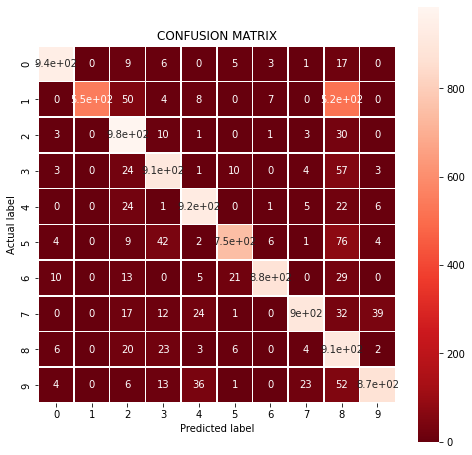

In [683]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'CONFUSION MATRIX'
plt.title(all_sample_title);